In [25]:
from wordcloud import WordCloud

import jieba

import matplotlib as mpl
import matplotlib.pyplot as plt


<font color=#0099ff size=4 face="黑体"> jieba用法 </font>

功能 1)：分词

jieba.cut方法接受两个输入参数: 1) 第一个参数为需要分词的字符串 2）cut_all参数用来控制是否采用全模式
jieba.cut_for_search方法接受一个参数：需要分词的字符串,该方法适合用于搜索引擎构建倒排索引的分词，粒度比较细
注意：待分词的字符串可以是gbk字符串、utf-8字符串或者unicode
jieba.cut以及jieba.cut_for_search返回的结构都是一个可迭代的generator，可以使用for循环来获得分词后得到的每一个词语(unicode)，也可以用list(jieba.cut(...))转化为list

In [7]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print ("Full Mode:", "/ ".join(seg_list)  )# 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode:", "/ ".join(seg_list) ) # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print (", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，然后在日本京都大学深造")  # 搜索引擎模式
print (", ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 然后, 在, 日本, 京都, 大学, 日本京都大学, 深造


功能 2) ：添加自定义词典

开发者可以指定自己自定义的词典，以便包含jieba词库里没有的词。虽然jieba有新词识别能力，但是自行添加新词可以保证更高的正确率
用法： jieba.load_userdict(file_name) # file_name为自定义词典的路径
词典格式和dict.txt一样，一个词占一行；每一行分三部分，一部分为词语，另一部分为词频，最后为词性（可省略），用空格隔开

自定义词典：https://github.com/fxsjy/jieba/blob/master/test/userdict.txt
用法示例：https://github.com/fxsjy/jieba/blob/master/test/test_userdict.py

功能 3) ：关键词提取

jieba.analyse.extract_tags(sentence,topK) #需要先import jieba.analyse
setence为待提取的文本
topK为返回几个TF/IDF权重最大的关键词，默认值为20

代码示例 （关键词提取）
https://github.com/fxsjy/jieba/blob/master/test/extract_tags.py

功能 4) : 词性标注
标注句子分词后每个词的词性，采用和ictclas兼容的标记法

用法示例
  >>> import jieba.posseg as pseg
  >>> words = pseg.cut("我爱北京天安门")
  >>> for w in words:
  ...    print w.word, w.flag
  ...
  我 r
  爱 v
  北京 ns
  天安门 ns

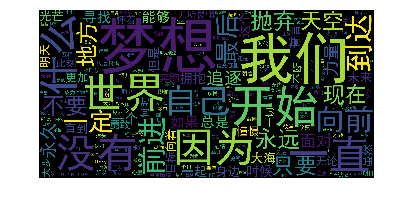

In [27]:
#读取txt文件
#定义一个空字符串
final = ""
#文件夹位置
#filename = r"E:\Program Files\爬虫\word.txt" 
#打开文件夹，读取内容，并进行分词
with open('海贼王.txt','r',encoding = 'utf-8') as f:    
    for line in f.readlines():        
        word = jieba.cut(line)        
        for i in word:            
            final = final + i +" "

#构造词云
word_pic = WordCloud(font_path = r'C:\Windows\Fonts\simhei.ttf',width = 2000,height = 1000).generate(final)
plt.imshow(word_pic)
#去掉坐标轴
plt.axis('off')
#保存图片到相应文件夹
plt.savefig(r'E:\Program Files\6.png')



In [28]:
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [38]:
# 初始化图片
image = Image.open('海贼王.jpg')
graph = np.array(image)

# 生成云图，这里需要注意的是WordCloud默认不支持中文，所以这里需要加载中文黑体字库
word_pic = WordCloud(font_path = r'C:\Windows\Fonts\simhei.ttf',background_color='white', width = 4000,height = 2000,max_words=1000, mask=graph).generate(final)
image_color = ImageColorGenerator(graph)

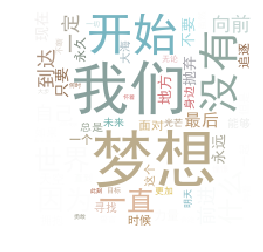

<Figure size 432x288 with 0 Axes>

In [40]:
# 显示图片
plt.imshow(word_pic)
plt.imshow(word_pic.recolor(color_func=image_color))
plt.axis("off") # 关闭图像坐标系
plt.show()
